In [ ]:
# prompt: write a code for the import of the token  of the kaggle api

!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [00:51<00:00, 193MB/s]
100% 5.20G/5.20G [00:51<00:00, 108MB/s]


In [ ]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from glob import glob
np.random.seed(7)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools
import keras
# from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [ ]:
df = pd.read_csv('/content/HAM10000_metadata.csv')

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


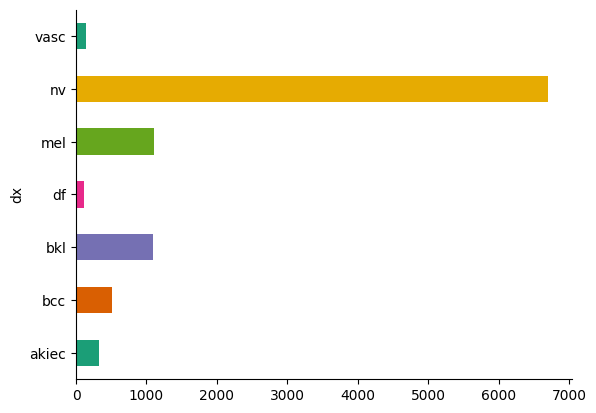

In [ ]:
# @title dx

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('dx').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
## After making barh graph between differnet classes we found most of the data avaliable is of Vasc


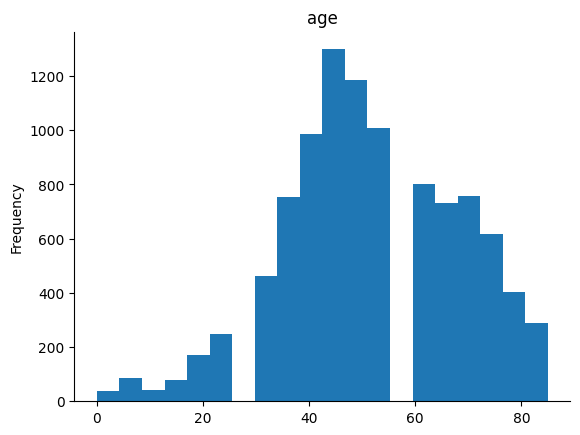

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
##3 after making unvariate analysis on Age colum we found the most of the ages are between 30 to 50 years of age

In [ ]:
df = df[df['age'] != 0]

In [ ]:
x= pd.DataFrame(df)

In [ ]:
x.describe(include = 'all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,9976,9976,9976,9976,9919.000000,9976,9976
unique,7449,9976,7,4,NaN,3,15
top,HAM_0000835,ISIC_0032258,nv,histo,NaN,male,back
freq,6,1,6675,5330,NaN,5383,2185
mean,NaN,NaN,NaN,NaN,52.067749,NaN,NaN
std,NaN,NaN,NaN,NaN,16.686741,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [ ]:
a= [str(i) for i in x['age']]

In [ ]:
y = x.copy()

In [ ]:
y['age'] = a

In [ ]:
y

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
y.describe()

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,9976,9976,9976,9976,9976,9976,9976
unique,7449,9976,7,4,18,3,15
top,HAM_0000835,ISIC_0032258,nv,histo,45.0,male,back
freq,6,1,6675,5330,1299,5383,2185


In [ ]:
z = pd.DataFrame(y,columns= ['lesson_id','image_id','dx','dx_tyoe','age','sex','localization'])
z

,lesson_id,image_id,dx,dx_tyoe,age,sex,localization
0,NaN,ISIC_0027419,bkl,NaN,80.0,male,scalp
1,NaN,ISIC_0025030,bkl,NaN,80.0,male,scalp
2,NaN,ISIC_0026769,bkl,NaN,80.0,male,scalp
3,NaN,ISIC_0025661,bkl,NaN,80.0,male,scalp
4,NaN,ISIC_0031633,bkl,NaN,75.0,male,ear
...,...,...,...,...,...,...,...
10010,NaN,ISIC_0033084,akiec,NaN,40.0,male,abdomen
10011,NaN,ISIC_0033550,akiec,NaN,40.0,male,abdomen
10012,NaN,ISIC_0033536,akiec,NaN,40.0,male,abdomen
10013,NaN,ISIC_0032854,akiec,NaN,80.0,male,face


In [ ]:
z.describe(include = ['object'])

,image_id,dx,age,sex,localization
count,9976,9976,9976,9976,9976
unique,9976,7,18,3,15
top,ISIC_0032258,nv,45.0,male,back
freq,1,6675,1299,5383,2185


In [ ]:
np.mean(y)
np.mean(z)

lesson_id   NaN
dx_tyoe     NaN
dtype: float64

In [ ]:
len(z.index) - z.count()

lesson_id       9976
image_id           0
dx                 0
dx_tyoe         9976
age                0
sex                0
localization       0
dtype: int64

In [ ]:
len(z.index)

9976

In [ ]:
z.count()

lesson_id          0
image_id        9976
dx              9976
dx_tyoe            0
age             9976
sex             9976
localization    9976
dtype: int64

In [ ]:
z= z.sort_values(by = ['age'])

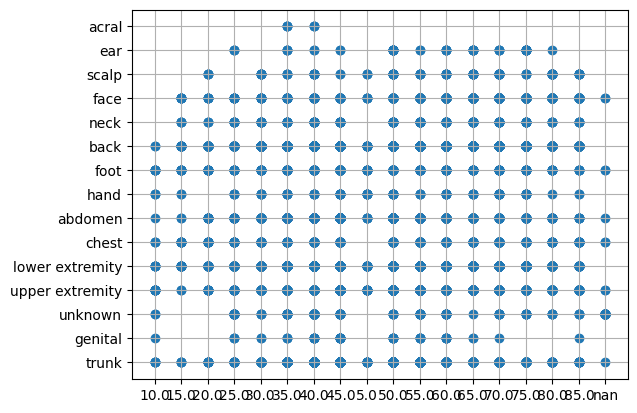

In [ ]:
plt.grid()
plt.scatter(z['age'],z['localization'])

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with age outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [ ]:
df.drop_duplicates(subset='image_id', inplace=True)

In [ ]:
missing_images = []
image_directory = '/content/HAM10000_images_part_1'
for filename in df['image_id']:
    if not os.path.exists(os.path.join(image_directory, filename + '.jpg')):
        missing_images.append(filename)
df = df[~df['image_id'].isin(missing_images)]

In [ ]:
desired_size = (224, 224)  # Set desired image size
for index, row in df.iterrows():
    image_path = os.path.join(image_directory, row['image_id'] + '.jpg')
    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, desired_size)
        cv2.imwrite(image_path, resized_image)

In [ ]:
b = x.dropna()
b

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
b['age'].count()

9919

In [ ]:
len(x.index)-b.count()

lesion_id       57
image_id        57
dx              57
dx_type         57
age             57
sex             57
localization    57
dtype: int64

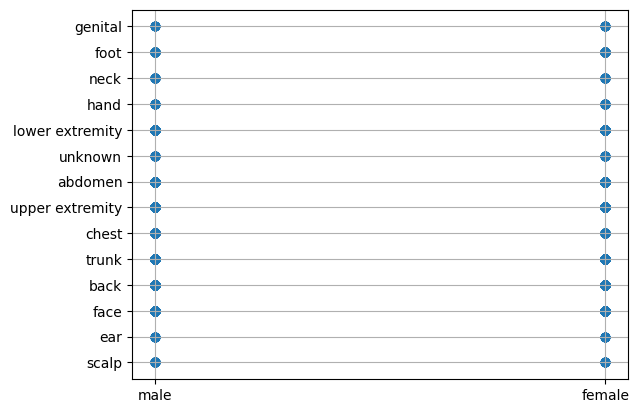

In [ ]:
plt.grid()
plt.scatter(df['sex'],df['localization'])
# sns.catplot(data=df, kind="swarm", x="sex", y="localization", hue="image_id",height = 5,aspect = 0.5)


In [ ]:
for i in range(len(df)):
  if df.iloc[i]['sex'] == 'unknown':
    print (i)
    df.drop(df.index[i])


In [ ]:
df['sex'].value_counts()

male      2709
female    2264
Name: sex, dtype: int64

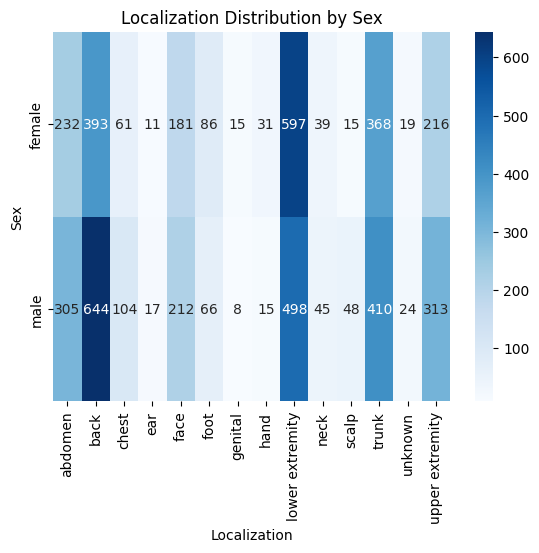

In [ ]:
import seaborn as sns
pivot_data = df.pivot_table(index='sex', columns='localization', aggfunc='size')
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Localization')
plt.ylabel('Sex')
plt.title('Localization Distribution by Sex')
plt.show()

In [ ]:
df[df['sex']=='female']['localization'].value_counts()


lower extremity    597
back               393
trunk              368
abdomen            232
upper extremity    216
face               181
foot                86
chest               61
neck                39
hand                31
unknown             19
scalp               15
genital             15
ear                 11
Name: localization, dtype: int64

In [ ]:
df[df['sex']=='male']['localization'].value_counts()


back               644
lower extremity    498
trunk              410
upper extremity    313
abdomen            305
face               212
chest              104
foot                66
scalp               48
neck                45
unknown             24
ear                 17
hand                15
genital              8
Name: localization, dtype: int64

In [ ]:
df.drop(df[df['sex'] == 'unknown'].index,inplace=True)

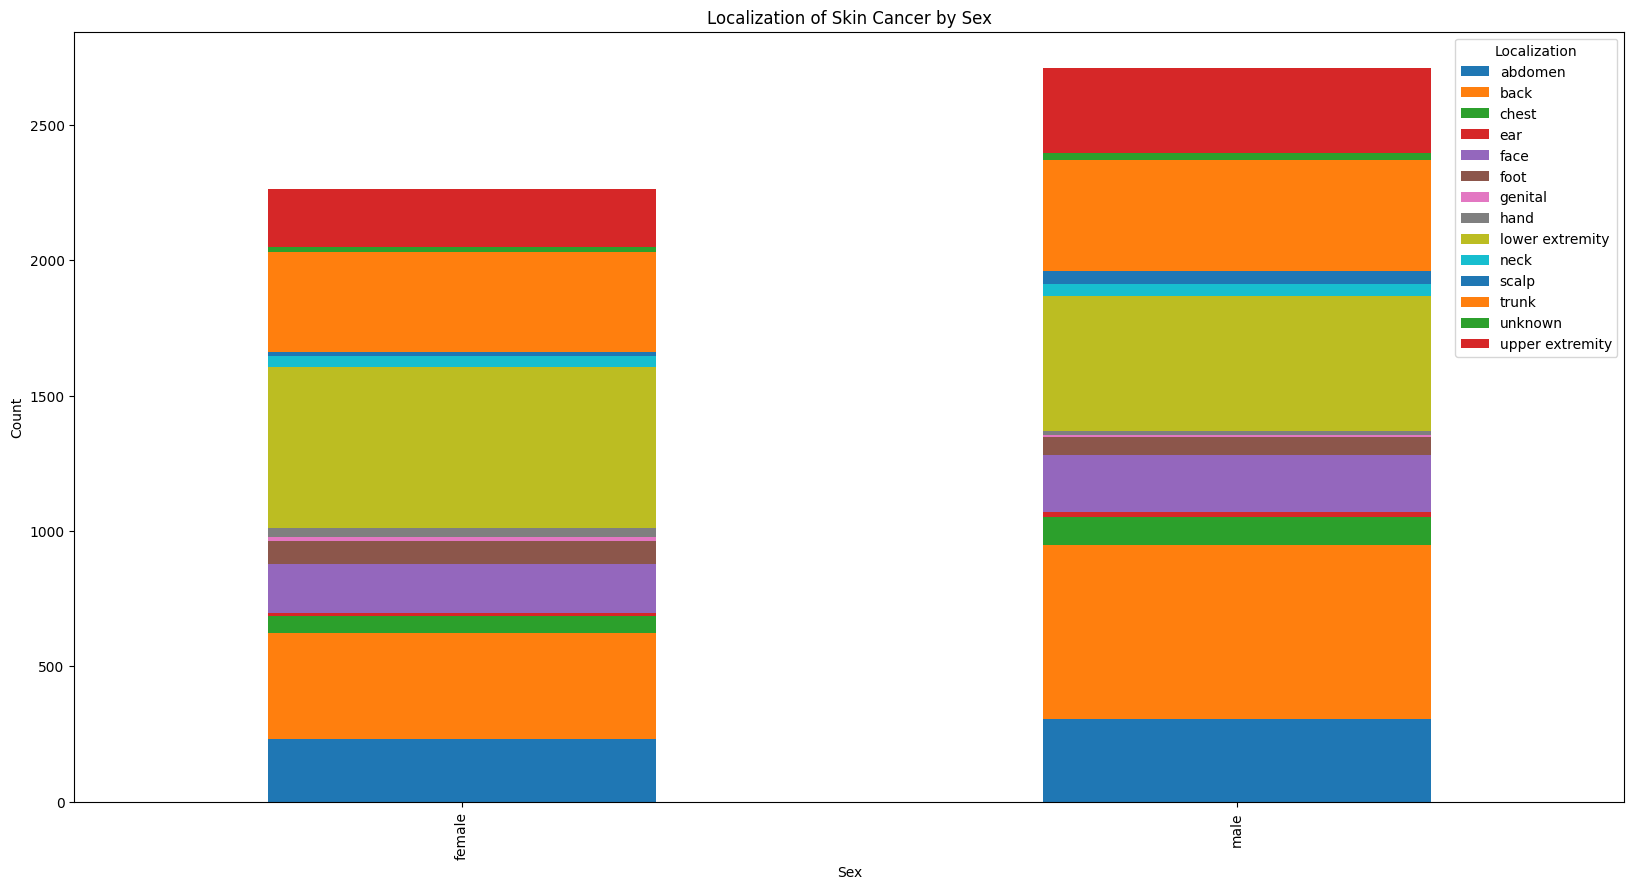

In [ ]:
grouped_data = df.groupby(['sex', 'localization']).size().unstack()
grouped_data.plot(kind='bar', stacked=True,figsize = (20,10))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Localization of Skin Cancer by Sex')
plt.legend(title='Localization')
plt.show()

# from the above result we conclude that the back is the part of the body where most of the people is affected by the skin cancer

In [ ]:
df['localization'].value_counts()

lower extremity    1095
back               1037
trunk               778
abdomen             537
upper extremity     529
face                393
chest               165
foot                152
neck                 84
scalp                63
hand                 46
unknown              43
ear                  28
genital              23
Name: localization, dtype: int64

In [ ]:
male = (df['sex'] == 'male').astype(int)

In [ ]:
female = (df['sex'] == 'female').astype(int)

In [ ]:
name_df=['Male','Female']


In [ ]:
df_gen=[male,female]

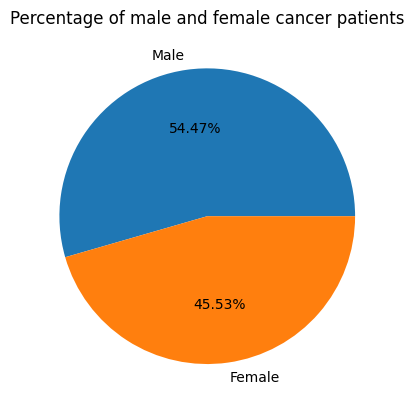

In [ ]:
gender = [len(df[df['sex'] == 'male']), len(df[df['sex'] == 'female'])]
mylabels = ["Male", "Female"]
plt.pie(gender, labels=mylabels, autopct="%.2f%%")
plt.title("Percentage of male and female cancer patients")
plt.show()

#from the above visualisation we can conclude that the male get cancer i.e 54.47 more than the female i,e 45.53

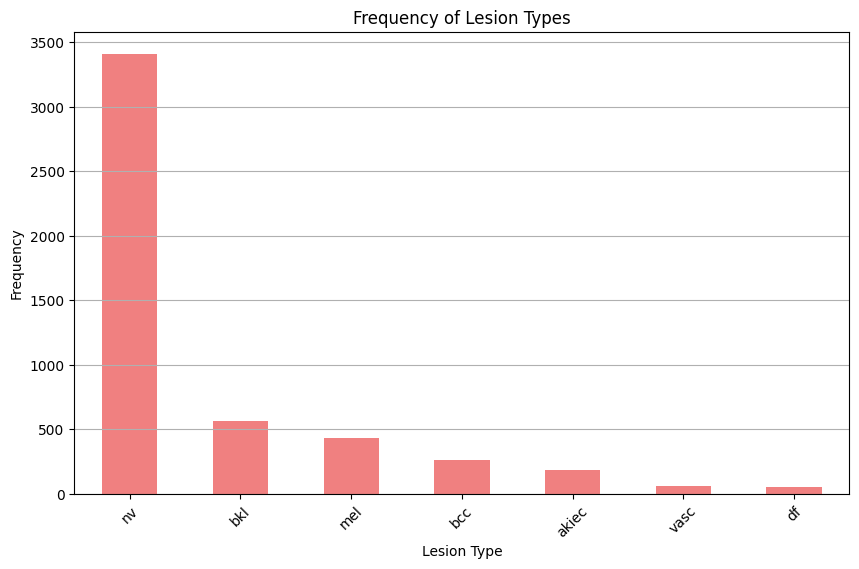

In [ ]:
plt.figure(figsize=(10, 6))
df['dx'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

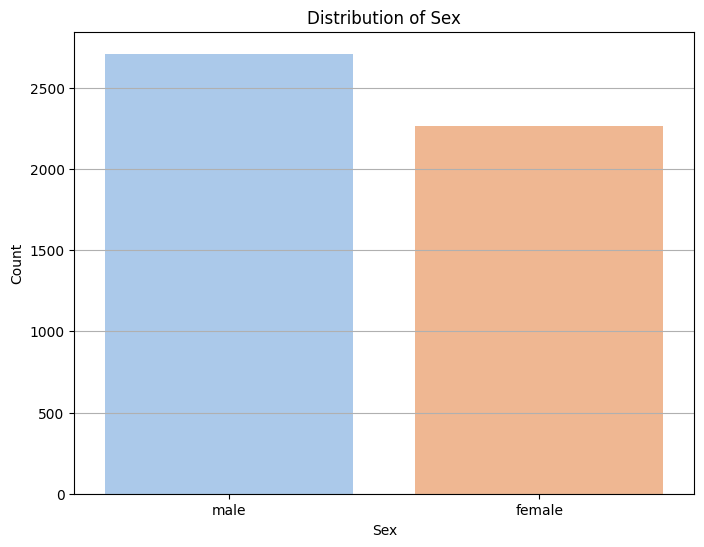

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

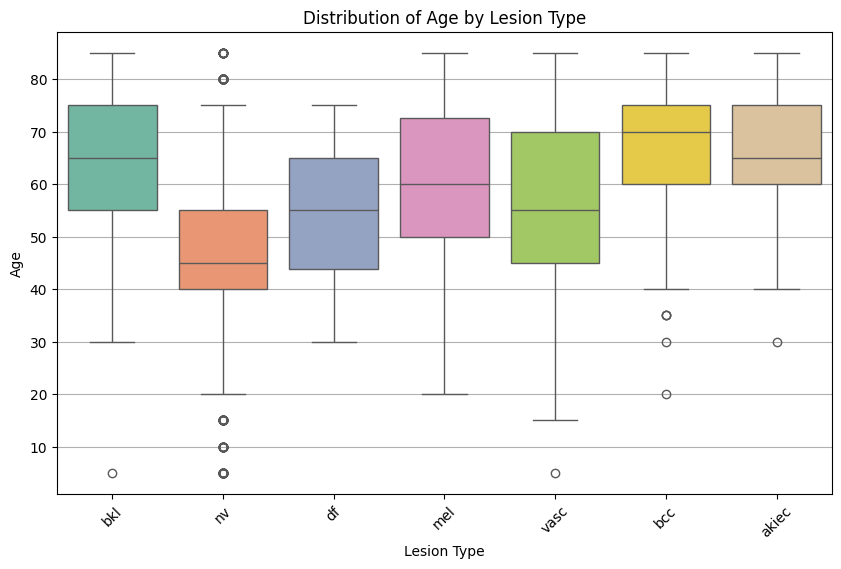

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dx', y='age', data=df, palette='Set2')
plt.title('Distribution of Age by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# I also made box plot for the different lesion type which shows the information in boxplot about differnt lesion typw and ages

In [ ]:
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['dx'])

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/HAM10000_images_part_1',  # Specify the directory containing the training images
    x_col="image_id",
    y_col="encoded_label",
    target_size=(224, 224),  # Specify the target image size
    batch_size=32,
    class_mode="raw",
    shuffle=True,
    seed=42
)

Found 0 validated image filenames.


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col="image_id",
    y_col="encoded_label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    shuffle=True,
    seed=42
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col="image_id",
    y_col="encoded_label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col="image_id",
    y_col="encoded_label",
    target_size=(224, 224),
    batch_size=1,
    class_mode="raw",
    shuffle=False
)

Found 0 validated image filenames.
Found 0 validated image filenames.
Found 0 validated image filenames.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
steps_per_epoch_train = len(train_generator)
steps_per_epoch_val = len(val_generator)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_generator,
    validation_steps=50,
    callbacks=[early_stopping]
)

ValueError: Asked to retrieve element 0, but the Sequence has length 0